In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
from PIL import Image
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True) # I will get file into flower flower_photos and I save it on (cache_dir), then unzip it using untar

228813984/228813984 [==============================] - 2s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir) # Now i convert my data_dir into pathlib, Now it will be more easy to use 
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/4895718876_0246882882_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5139971615_434ff8ed8b_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/7652532108_01ef94c476.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/6042014768_b57f0bfc79_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/2949654221_909b0c86a1_n.jpg')]

In [53]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


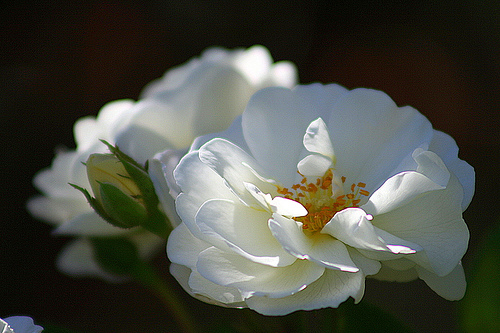

In [7]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

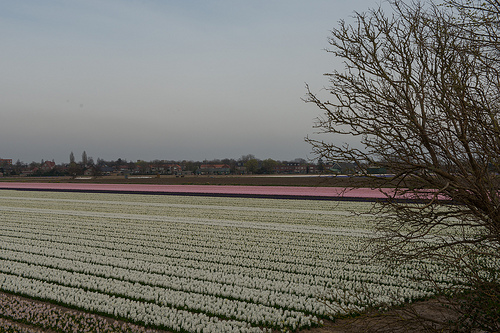

In [8]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [54]:
flowers_images_dict  = {
    'roses': list(data_dir.glob('roses/*')),
    'tulips': list(data_dir.glob('tulips/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'daisy': list(data_dir.glob('daisy/*'))
}

In [10]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/1645761726_2b1be95472.jpg'),
 PosixPath('datasets/flower_photos/roses/3231873181_faf2da6382.jpg'),
 PosixPath('datasets/flower_photos/roses/1831404161_d2df86fd70.jpg'),
 PosixPath('datasets/flower_photos/roses/14414100710_753a36fce9.jpg'),
 PosixPath('datasets/flower_photos/roses/319298955_0c72bd36bf.jpg')]

In [55]:
flowers_labels_dict  = {
    'roses': 0,
    'tulips': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'daisy': 4
}

In [56]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/1645761726_2b1be95472.jpg'

In [57]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img # It read my img and convert into 3D np.array

array([[[  0,   3,   4],
        [  2,   6,   7],
        [  4,   9,   7],
        ...,
        [  7,  23,  16],
        [  6,  21,  17],
        [  6,  20,  18]],

       [[  3,  11,   0],
        [  6,  14,   4],
        [  0,   2,   1],
        ...,
        [ 14,  17,  21],
        [ 20,  19,  23],
        [ 25,  18,  21]],

       [[  0,   5,   4],
        [  0,   4,   3],
        [  2,   6,   7],
        ...,
        [ 13,  20,  17],
        [ 12,  20,  19],
        [  5,  19,  18]],

       ...,

       [[123, 120, 122],
        [125, 129, 117],
        [ 77,  84,  63],
        ...,
        [  3,  51,  23],
        [  0,  44,  21],
        [  2,  40,  28]],

       [[133, 123, 116],
        [110, 109,  89],
        [106, 106,  88],
        ...,
        [  6,  41,  31],
        [  4,  39,  29],
        [  7,  43,  31]],

       [[141, 129, 125],
        [ 85,  83,  72],
        [183, 190, 185],
        ...,
        [  8,  46,  24],
        [  4,  43,  21],
        [  6,  47,  20]]

In [58]:
img.shape

(333, 500, 3)

In [59]:
cv2.resize(img,(180,180)).shape # We need to make same dimensions for all images to train our model

(180, 180, 3)

In [60]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img) # My X is 3D array
        y.append(flowers_labels_dict[flower_name]) # My y must be a number 

In [61]:
X = np.array(X) # I convert it for future use
y = np.array(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
len(X_train)

2936

In [19]:
len(X_test)

734

In [62]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [21]:
X_train_scaled[0][:5]

array([[[0.5372549 , 0.49803922, 0.45490196],
        [0.4745098 , 0.41960784, 0.40392157],
        [0.50980392, 0.49019608, 0.43137255],
        ...,
        [0.07843137, 0.09019608, 0.04705882],
        [0.10196078, 0.1254902 , 0.08627451],
        [0.05882353, 0.0627451 , 0.02745098]],

       [[0.5372549 , 0.48627451, 0.46666667],
        [0.3254902 , 0.3372549 , 0.32156863],
        [0.55686275, 0.54117647, 0.49019608],
        ...,
        [0.0745098 , 0.0627451 , 0.03529412],
        [0.0745098 , 0.07843137, 0.05490196],
        [0.07843137, 0.08235294, 0.04705882]],

       [[0.32941176, 0.31372549, 0.32156863],
        [0.30980392, 0.35294118, 0.33333333],
        [0.47058824, 0.45490196, 0.45882353],
        ...,
        [0.05882353, 0.04705882, 0.00784314],
        [0.06666667, 0.05882353, 0.02745098],
        [0.09411765, 0.09411765, 0.0627451 ]],

       [[0.24313725, 0.28627451, 0.2745098 ],
        [0.32941176, 0.39607843, 0.39607843],
        [0.38039216, 0.42352941, 0.

In [22]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'), # I have 16 filters and size of filter is 3, number of filter its just try and error
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(), # Now I convert it into 1D array, for my Dense network
      layers.Dense(128, activation = 'relu'),
      layers.Dense(num_classes) 
]) 
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), # My final array is exact value, so I use this loss
    metrics = ['accuracy']
)
model.fit(X_train_scaled, y_train, epochs = 30)

Epoch 1/30
92/92 [==============================] - 109s 1s/step - loss: 1.3213 - accuracy: 0.4363
Epoch 2/30
92/92 [==============================] - 112s 1s/step - loss: 0.9825 - accuracy: 0.6138
Epoch 3/30
92/92 [==============================] - 121s 1s/step - loss: 0.7780 - accuracy: 0.7027
Epoch 4/30
92/92 [==============================] - 124s 1s/step - loss: 0.5552 - accuracy: 0.7990
Epoch 5/30
92/92 [==============================] - 125s 1s/step - loss: 0.3256 - accuracy: 0.8839
Epoch 6/30
92/92 [==============================] - 120s 1s/step - loss: 0.2029 - accuracy: 0.9329
Epoch 7/30
92/92 [==============================] - 112s 1s/step - loss: 0.1307 - accuracy: 0.9605
Epoch 8/30
92/92 [==============================] - 111s 1s/step - loss: 0.0696 - accuracy: 0.9816
Epoch 9/30
92/92 [==============================] - 115s 1s/step - loss: 0.0637 - accuracy: 0.9816
Epoch 10/30
92/92 [==============================] - 112s 1s/step - loss: 0.0213 - accuracy: 0.9952
Epoch 11/

In [23]:
model.evaluate(X_test_scaled, y_test)

23/23 [==============================] - 15s 616ms/step - loss: 3.9098 - accuracy: 0.6308


[3.9098446369171143, 0.6307901740074158]

In [63]:
predictions = model.predict(X_test_scaled)
predictions

23/23 [==============================] - 8s 354ms/step


array([[ -4.3910294 ,   3.372511  ,   9.994505  ,  -9.776916  ,
          4.034734  ],
       [ 20.223133  ,   5.874608  ,  -8.301751  , -19.49106   ,
          0.42287934],
       [ -3.4722102 ,  -4.9100394 ,  13.232655  , -13.4514885 ,
          6.775044  ],
       ...,
       [ -4.499729  ,  -2.9876206 ,  -1.2828823 ,   8.162153  ,
          0.59730303],
       [  8.331332  ,  25.73054   , -14.762057  ,  -8.701387  ,
        -15.744644  ],
       [  1.3107187 ,   0.40720946,   4.1632047 ,  -6.249868  ,
         -0.41892958]], dtype=float32)

In [64]:
score = tf.nn.softmax(predictions[0])

In [65]:
np.argmax(score)

2

In [66]:
y_test[0]

1

In [79]:
data_augmentation = keras.Sequential(
    [
      
    #layers.experimental.preprocessing.RandomFlip("horizontal", # This make flip of my image
                                                #input_shape=(img_height, img_width, 3)),"""
                                                             
    layers.experimental.preprocessing.RandomRotation(0.1), # This rotate the object                                  
    layers.experimental.preprocessing.RandomZoom(0.1) # Its transformation to zoom an object

])

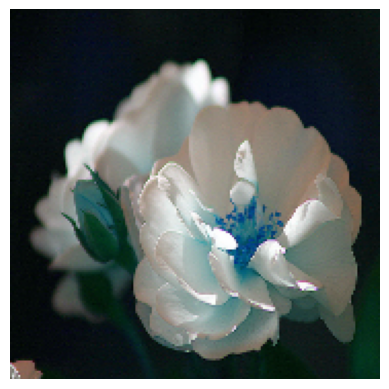

In [80]:
plt.axis('off')
plt.imshow(X[0])

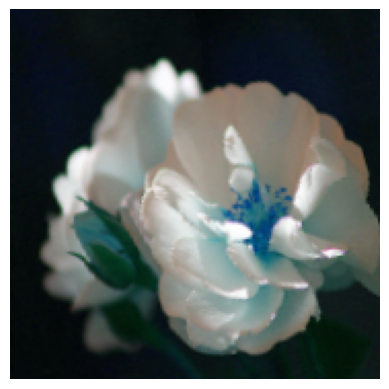

In [82]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [88]:
num_classes = 5

model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Dropout(0.2), # I drop some of my neuros for better accuracy score
    layers.Flatten(),

    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
])
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)
model.fit(X_train_scaled, y_train, epochs = 20)

Epoch 1/20
92/92 [==============================] - 129s 1s/step - loss: 1.4314 - accuracy: 0.3873
Epoch 2/20
92/92 [==============================] - 128s 1s/step - loss: 1.0776 - accuracy: 0.5794
Epoch 3/20
92/92 [==============================] - 126s 1s/step - loss: 0.9828 - accuracy: 0.6223
Epoch 4/20
92/92 [==============================] - 126s 1s/step - loss: 0.8976 - accuracy: 0.6526
Epoch 5/20
92/92 [==============================] - 129s 1s/step - loss: 0.8163 - accuracy: 0.6907
Epoch 6/20
92/92 [==============================] - 127s 1s/step - loss: 0.7461 - accuracy: 0.7132
Epoch 7/20
92/92 [==============================] - 125s 1s/step - loss: 0.7163 - accuracy: 0.7285
Epoch 8/20
92/92 [==============================] - 123s 1s/step - loss: 0.6701 - accuracy: 0.7459
Epoch 9/20
92/92 [==============================] - 124s 1s/step - loss: 0.6235 - accuracy: 0.7663
Epoch 10/20
92/92 [==============================] - 124s 1s/step - loss: 0.6042 - accuracy: 0.7762
Epoch 11/

In [89]:
model.evaluate(X_train_scaled, y_train)

92/92 [==============================] - 33s 360ms/step - loss: 0.2068 - accuracy: 0.9336


[0.20680740475654602, 0.9335830807685852]